In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

In [11]:
df = pd.read_csv("Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [13]:
def get_metadata(dataframe):
    print(dataframe.info())
    print(dataframe.describe(include='all'))
    print("Number of Duplicate Rows : ", dataframe.duplicated().sum())
    print("Sample dataset values :")
    print(dataframe.head(20))

In [14]:
get_metadata(dataframe=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.00

In [15]:
# Dataset Description :
# =====================

# This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

# Store - the store number

# Date - the week of sales

# Weekly_Sales - sales for the given store

# Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

# Temperature - Temperature on the day of sale

# Fuel_Price - Cost of fuel in the region

# CPI – Prevailing consumer price index

# Unemployment - Prevailing unemployment rate

# Holiday Events
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [16]:
df.skew()

C:\Users\Meaga Varsha R\AppData\Local\Temp\ipykernel_131492\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Store           0.000000
Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

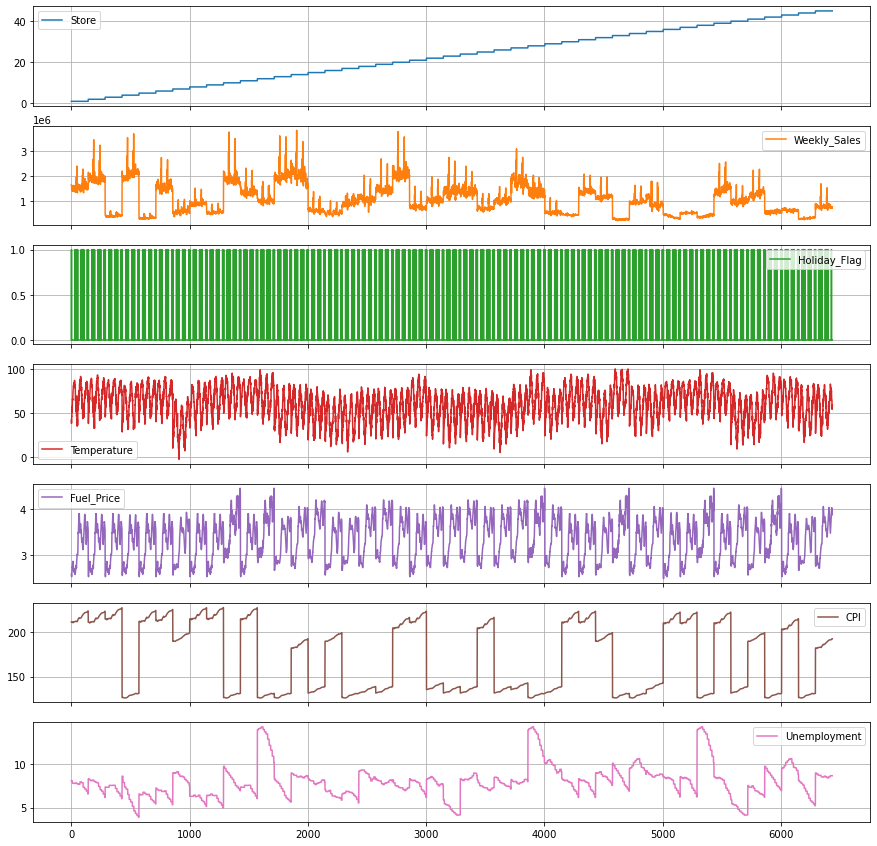

In [17]:
df.plot(subplots=True, grid=True, figsize=(15,15))  # ===> Value Distribution

In [18]:
# df.drop(["Temperature","Unemployment"], axis="columns", inplace=True)

## Plot Function

In [19]:
def bar_plot(x_col, y_col):
    plt.figure(figsize =(25, 12))
    x = x_col
    y = y_col
    plt.bar(x, y)
    plt.grid()
    plt.xticks(x) # ====> to show all values of x-axis
    plt.show()

In [20]:
# Analysis Tasks

# Basic Statistics tasks

# 1) Which store has maximum sales

# 2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

# 3) Which store/s has good quarterly growth rate in Q3’2012

# 4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

# 5) Provide a monthly and semester view of sales in units and give insights

### 1) Which store has maximum sales?

In [21]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [22]:
# df.groupby(['Store']).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum')).reset_index()

store_sales_df = df.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))

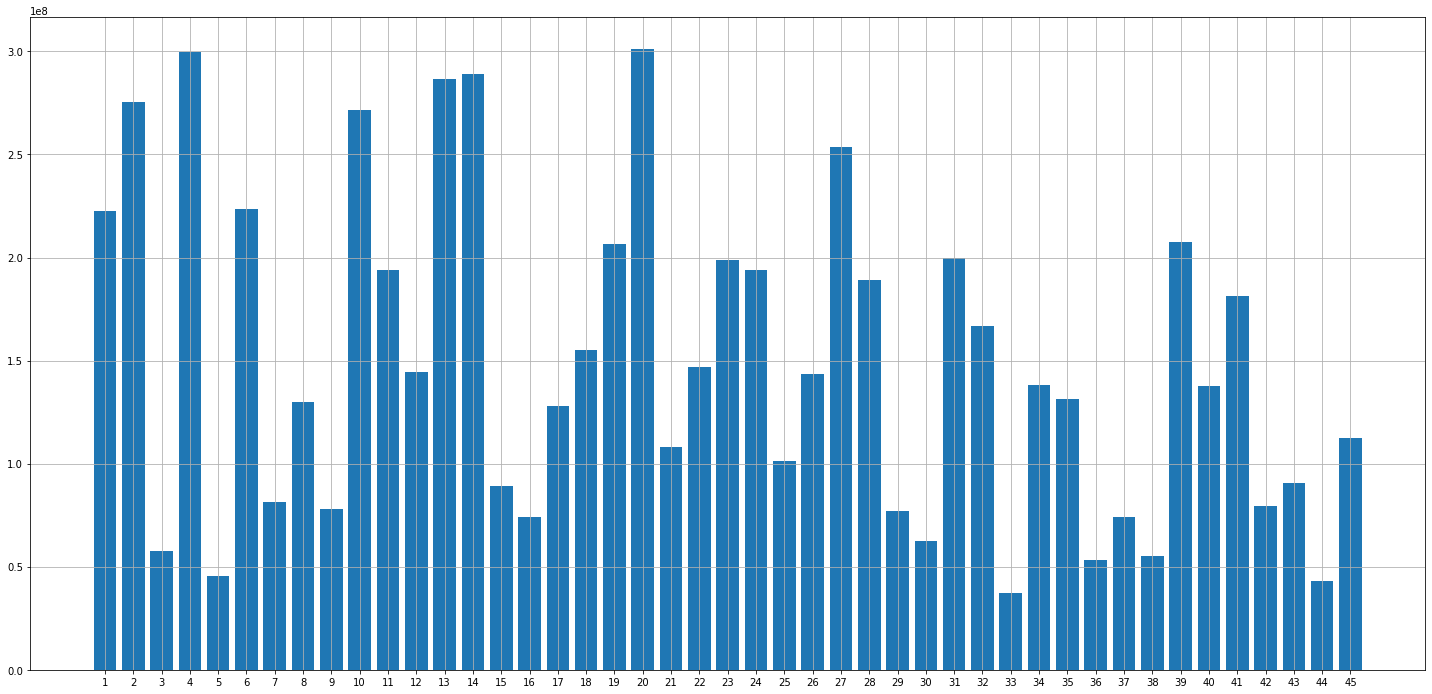

In [23]:
bar_plot(x_col=store_sales_df['Store'], y_col=store_sales_df['Sum_of_Weekly_Sales'])

In [24]:
# store_sales_df
store_sales_df[(store_sales_df['Sum_of_Weekly_Sales'] == max(store_sales_df['Sum_of_Weekly_Sales']))]

,Store,Sum_of_Weekly_Sales
19,20,3.013978e+08


### 2) Which store has maximum standard deviation i.e., the sales vary a lot? 

In [25]:
# GroupBy Store aggregate Weekly_Sales by Standard Deviation

In [26]:
std_stores = df.groupby('Store', as_index=False).agg(Std_of_Weekly_Sales=('Weekly_Sales','std'))

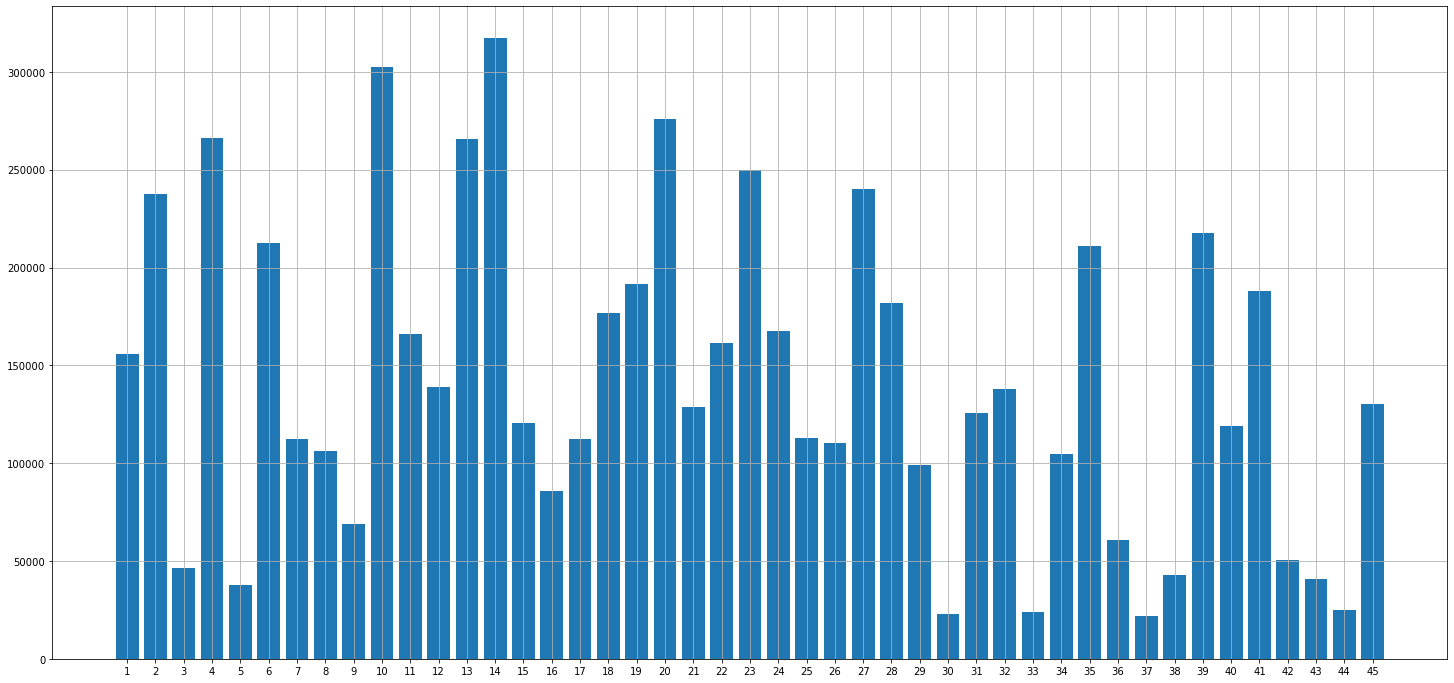

In [27]:
bar_plot(x_col=std_stores['Store'], y_col=std_stores['Std_of_Weekly_Sales'])

In [28]:
std_stores[(std_stores['Std_of_Weekly_Sales'] == max(std_stores['Std_of_Weekly_Sales']))]

,Store,Std_of_Weekly_Sales
13,14,317569.949476


In [29]:
df[(df['Store']==14)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1859,14,05-02-2010,2623469.95,0,27.31,2.784,181.871190,8.992
1860,14,12-02-2010,1704218.84,1,27.73,2.773,181.982317,8.992
1861,14,19-02-2010,2204556.70,0,31.27,2.745,182.034782,8.992
1862,14,26-02-2010,2095591.63,0,34.89,2.754,182.077469,8.992
1863,14,05-03-2010,2237544.75,0,37.13,2.777,182.120157,8.992
...,...,...,...,...,...,...,...,...
1997,14,28-09-2012,1522512.20,0,64.88,3.997,192.013558,8.684
1998,14,05-10-2012,1687592.16,0,64.89,3.985,192.170412,8.667
1999,14,12-10-2012,1639585.61,0,54.47,4.000,192.327265,8.667
2000,14,19-10-2012,1590274.72,0,56.47,3.969,192.330854,8.667


In [30]:
df[(df['Store']==37)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5148,37,05-02-2010,536006.73,0,45.97,2.572,209.852966,8.554
5149,37,12-02-2010,529852.70,1,46.11,2.548,209.997021,8.554
5150,37,19-02-2010,510382.50,0,45.66,2.514,210.045102,8.554
5151,37,26-02-2010,513615.82,0,50.87,2.561,210.077189,8.554
5152,37,05-03-2010,519255.68,0,51.33,2.625,210.109275,8.554
...,...,...,...,...,...,...,...,...
5286,37,28-09-2012,527953.14,0,79.49,3.666,221.655600,6.623
5287,37,05-10-2012,546122.37,0,73.57,3.617,221.853340,6.228
5288,37,12-10-2012,521810.75,0,71.28,3.601,222.051079,6.228
5289,37,19-10-2012,551969.10,0,74.06,3.594,222.095172,6.228


### Find out the coefficient of mean to standard deviation ==> Coefficient of Variation

In [31]:
#  coefficient of mean to standard deviation
stats_df = df.groupby('Store', as_index=False).agg(Sales_sum=('Weekly_Sales','sum'), 
                                        Mean_Sales=('Weekly_Sales','mean'), 
                                        Std_Sales=('Weekly_Sales', 'std'),
                                        Sales_Variance=('Weekly_Sales','var'))
stats_df

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10


In [32]:
stats_df['Coeff_of_Variation'] = stats_df['Std_Sales'] / stats_df['Mean_Sales'] * 100
stats_df

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance,Coeff_of_Variation
0,1,2.224028e+08,1.555264e+06,155980.767761,2.433000e+10,10.029212
1,2,2.753824e+08,1.925751e+06,237683.694682,5.649354e+10,12.342388
2,3,5.758674e+07,4.027044e+05,46319.631557,2.145508e+09,11.502141
3,4,2.995440e+08,2.094713e+06,266201.442297,7.086321e+10,12.708254
4,5,4.547569e+07,3.180118e+05,37737.965745,1.424154e+09,11.866844
5,6,2.237561e+08,1.564728e+06,212525.855862,4.516724e+10,13.582286
6,7,8.159828e+07,5.706173e+05,112585.469220,1.267549e+10,19.730469
7,8,1.299512e+08,9.087495e+05,106280.829881,1.129561e+10,11.695283
8,9,7.778922e+07,5.439806e+05,69028.666585,4.764957e+09,12.689547
9,10,2.716177e+08,1.899425e+06,302262.062504,9.136235e+10,15.913349


### 3) Which store/s has good quarterly growth rate in Q3’2012

In [33]:
# 1. Assign Categories for every quarter in Year ==> Q1, Q2, Q3, Q4
# 2. Filter out Rows for year=2012
# 3. GroupBy Store and Quarter, and aggregate with sum for Weekly_Sales
# 4. Find Growth Rate for each quarter in a year ===> using apply and Lambda Function
# 5. Filter out Q3 category and find the Max % growth

In [34]:
df['Year'] = pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.year
df['Month'] = pd.to_datetime(df['Date'], format="%d-%m-%Y").dt.month

In [35]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [36]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >=7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan

In [37]:
df['Quarter'] = df['Month'].apply(assign_quarter_category)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Q4


In [38]:
df_2012 = df[(df['Year']) == 2012]
df_2012.drop(['Month', 'Year'], axis='columns', inplace=True)

C:\Users\Meaga Varsha R\AppData\Local\Temp\ipykernel_131492\894813246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012.drop(['Month', 'Year'], axis='columns', inplace=True)


In [39]:
df_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
100,1,06-01-2012,1550369.92,0,49.01,3.157,219.714258,7.348,Q1
101,1,13-01-2012,1459601.17,0,48.53,3.261,219.892526,7.348,Q1
102,1,20-01-2012,1394393.84,0,54.11,3.268,219.985689,7.348,Q1
103,1,27-01-2012,1319325.59,0,54.26,3.290,220.078852,7.348,Q1
104,1,03-02-2012,1636339.65,0,56.55,3.360,220.172015,7.348,Q1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4


In [40]:
df_2012.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,1935.00000,1935,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935
unique,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,06-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,Q1
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,585
mean,23.00000,NaN,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964,NaN
std,12.99053,NaN,5.366535e+05,0.210645,16.944776,0.276605,40.681282,1.699465,NaN
min,1.00000,NaN,2.369205e+05,0.000000,7.460000,3.031000,130.157516,3.879000,NaN
25%,12.00000,NaN,5.585294e+05,0.000000,52.060000,3.545000,136.753000,6.228000,NaN
50%,23.00000,NaN,9.604761e+05,0.000000,65.540000,3.717000,190.461896,7.147000,NaN
75%,34.00000,NaN,1.426383e+06,0.000000,76.575000,3.891000,220.488647,8.253000,NaN


In [41]:
q_sales = df_2012.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
q_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             20723762.83
      Q2             20978760.12
      Q3             20253947.78
      Q4              6245587.29
2     Q1             24528220.70
...                          ...
44    Q4              1360020.41
45    Q1              9805267.57
      Q2             10390767.83
      Q3              9581268.38
      Q4              2946326.39

[180 rows x 1 columns]

<AxesSubplot:xlabel='Store,Quarter'>

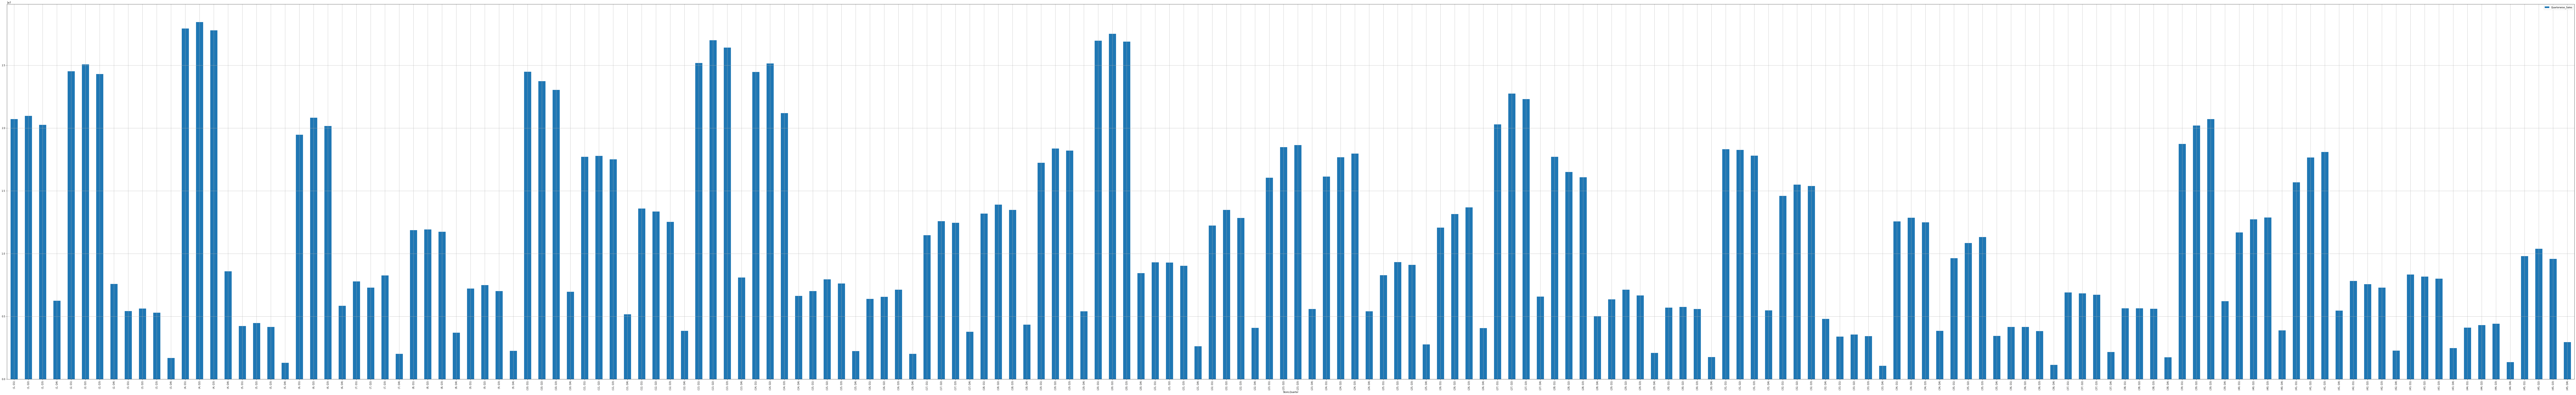

In [42]:
q_sales.plot(kind = 'bar', grid=True, figsize=(200, 30))

In [43]:
# df_2012.groupby(pd.Grouper(key='Date', freq='Q'))['Weekly_Sales'].sum()

In [44]:
q_sales

Quarterwise_Sales
Store Quarter                   
1     Q1             20723762.83
      Q2             20978760.12
      Q3             20253947.78
      Q4              6245587.29
2     Q1             24528220.70
...                          ...
44    Q4              1360020.41
45    Q1              9805267.57
      Q2             10390767.83
      Q3              9581268.38
      Q4              2946326.39

[180 rows x 1 columns]

In [45]:
quarterly_percentage = q_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
quarterly_percentage

Quarterwise_Sales
Store Quarter                   
1     Q1               30.385832
      Q2               30.759717
      Q3               29.696975
      Q4                9.157476
2     Q1               30.097197
...                          ...
44    Q4                9.586132
45    Q1               29.963875
      Q2               31.753103
      Q3               29.279357
      Q4                9.003666

[180 rows x 1 columns]

In [46]:
quarterly_percentage.reset_index(inplace=True)
Q3 = quarterly_percentage[(quarterly_percentage['Quarter']) == 'Q3']

In [47]:
Q3

,Store,Quarter,Quarterwise_Sales
2,1,Q3,29.696975
6,2,Q3,29.821276
10,3,Q3,29.393455
14,4,Q3,29.962742
18,5,Q3,29.386961
22,6,Q3,30.411367
26,7,Q3,32.572264
30,8,Q3,29.945906
34,9,Q3,29.290652
38,10,Q3,29.448634


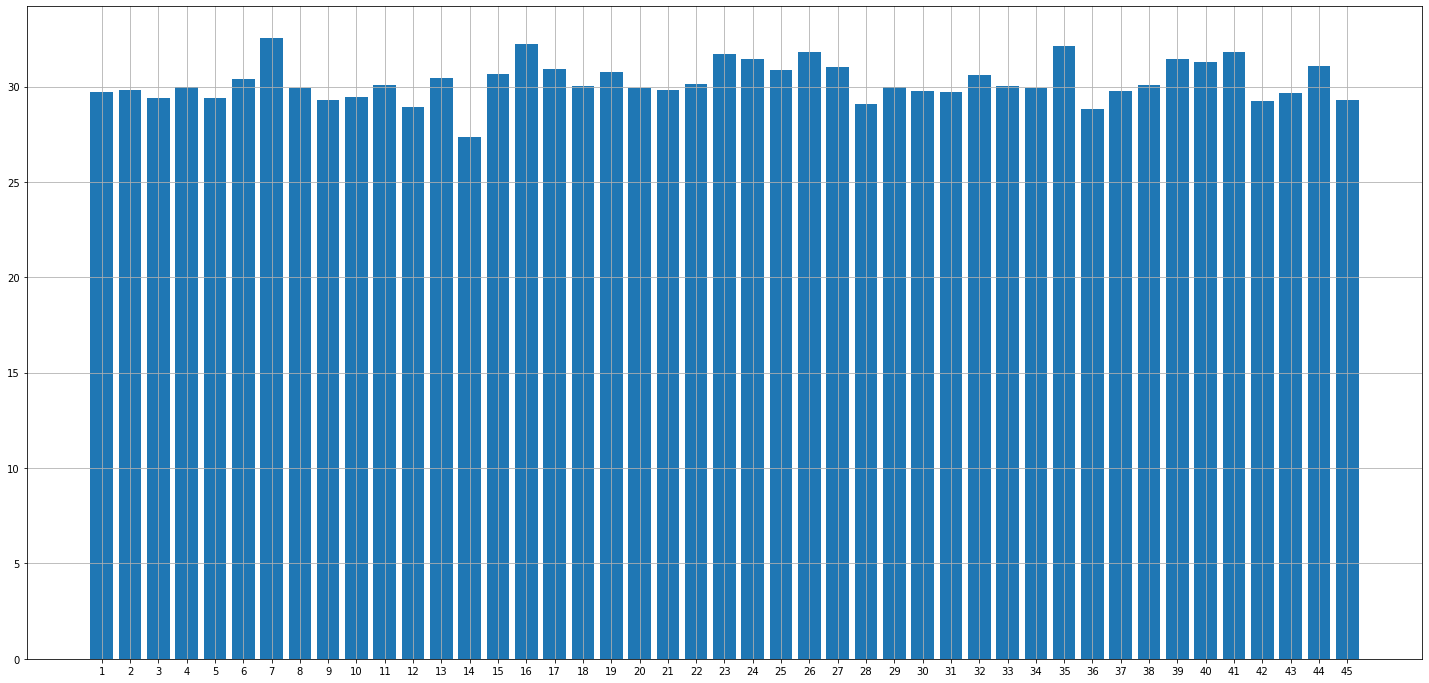

In [48]:
bar_plot(x_col=Q3['Store'], y_col=Q3['Quarterwise_Sales'])

In [49]:
Q3[(Q3['Quarterwise_Sales'] == max(Q3['Quarterwise_Sales']))]

,Store,Quarter,Quarterwise_Sales
26,7,Q3,32.572264


### 4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [50]:
# Holiday Events
# ==============
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [51]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday'   

In [52]:
holiday_analysis_df = df.drop(['Store', 'Year', 'Month'], axis='columns')
holiday_analysis_df['Holiday'] = holiday_analysis_df['Date'].apply(assign_holiday)
holiday_analysis_df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


In [53]:
mean_df = holiday_analysis_df.groupby('Holiday').agg(Mean_Weekly_Sales=('Weekly_Sales','mean'))

In [72]:
mean_df

,Mean_Weekly_Sales
Holiday,
Christmas,960833.112
Labour Day,1042427.294
Non-Holiday,1041256.380
Super Bowl,1079127.988
Thanksgiving,1471273.428


<AxesSubplot:xlabel='Holiday'>

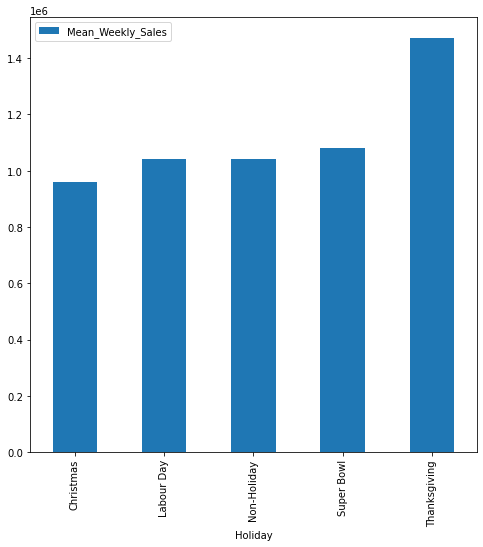

In [55]:
mean_df.plot(kind='bar', y='Mean_Weekly_Sales', figsize=(8,8))

In [56]:
mean_df.sort_values(by='Mean_Weekly_Sales')

,Mean_Weekly_Sales
Holiday,
Christmas,9.608331e+05
Non-Holiday,1.041256e+06
Labour Day,1.042427e+06
Super Bowl,1.079128e+06
Thanksgiving,1.471273e+06


In [57]:
holiday_analysis_df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Q1,Super Bowl
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Q4,Non-Holiday


In [58]:
holiday_analysis_df.groupby('Quarter').agg({'Weekly_Sales':'std'})

,Weekly_Sales
Quarter,
Q1,531586.678340
Q2,543203.300352
Q3,528621.228868
Q4,654298.120425


In [73]:
# pd.pivot_table(holiday_analysis_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':np.median,
#                                                                       'CPI':np.mean})
pd.pivot_table(holiday_analysis_df, index=["Quarter",'Holiday'], aggfunc={'Weekly_Sales':np.mean})

Weekly_Sales
Quarter Holiday                   
Q1      Non-Holiday     998837.001
        Super Bowl     1079127.988
Q2      Non-Holiday    1040806.407
Q3      Labour Day     1042427.294
        Non-Holiday    1021696.505
Q4      Christmas       960833.112
        Non-Holiday    1115843.259
        Thanksgiving   1471273.428

<AxesSubplot:title={'center':'Weekly_Sales'}, xlabel='Quarter'>

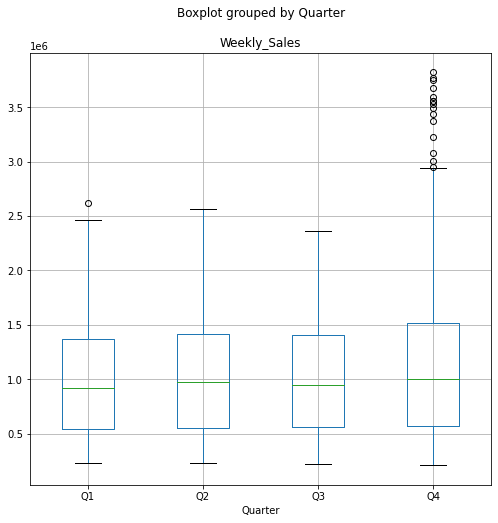

In [74]:
holiday_analysis_df.boxplot(by='Quarter', column=['Weekly_Sales'], figsize=(8,8))

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

In [81]:
pd.pivot_table(holiday_analysis_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':'sum', 'CPI':np.mean})

# SUM OF WEEKLY SALES IS HIGHER IN NON-HOLIDAY WEEKS

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.602,6231919435.550
1,171.268,505299551.560


In [76]:
pd.pivot_table(holiday_analysis_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':np.median, 'CPI':np.mean})

# MEDIAN OF WEEKLY SALES IS HIGHER IN NON-HOLIDAY WEEKS

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.602,956211.200
1,171.268,1018538.040


In [77]:
pd.pivot_table(holiday_analysis_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':np.mean, 'CPI':np.mean})

,CPI,Weekly_Sales
Holiday_Flag,,
0,171.602,1041256.380
1,171.268,1122887.892


In [63]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106,2010,2,Q1
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106,2010,2,Q1
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106,2010,2,Q1
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106,2010,2,Q1
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106,2010,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684,2012,9,Q3
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667,2012,10,Q4
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667,2012,10,Q4
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667,2012,10,Q4


In [64]:
temp_sales = df.groupby('Month').agg({'Weekly_Sales':np.sum, 'Temperature':np.mean})
temp_sales

,Weekly_Sales,Temperature
Month,,
1,332598438.490,37.605
2,568727890.450,38.901
3,592785901.280,49.822
4,646859784.970,57.615
5,557125571.950,65.462
6,622629886.840,75.208
7,650000977.250,79.744
8,613090208.820,79.274
9,578761179.260,72.416


<AxesSubplot:xlabel='Temperature'>

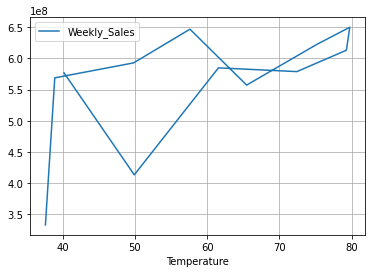

In [65]:
temp_sales = df.groupby('Month').agg({'Weekly_Sales':np.sum, 'Temperature':np.mean})
# bar_plot(x_col=temp_sales['Temperature'],y_col=temp_sales['Weekly_Sales'])
temp_sales.plot(kind='line', x='Temperature', y='Weekly_Sales', grid=True)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

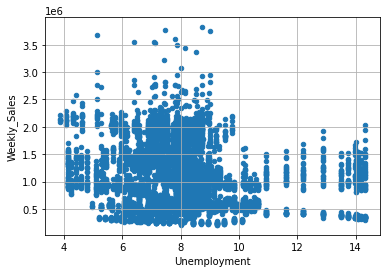

In [66]:
unemp_sales = df.groupby('Month').agg({'Weekly_Sales':np.sum, 'Unemployment':np.mean})
# bar_plot(unemp_sales['Unemployment'], unemp_sales['Weekly_Sales'])
df.plot(kind='scatter', x='Unemployment', y='Weekly_Sales', grid=True)

In [67]:
# Find Mean Weekly_Sales for non-holiday weeks (Holiday_Flag = 0) for all stores
# Max of Weekly_Sales for Holiday_Flag = 1 / Sort according to Weekly_Sales for all stores

In [68]:
# non_holiday = df[(df['Holiday_Flag']) == 0]
# holiday = df[(df['Holiday_Flag']) == 1]
# print("Average Weekly_Sales for entire Dataset : ", df['Weekly_Sales'].mean())
# print("Average Weekly_Sales on Non-Holiday Weeks : ", non_holiday['Weekly_Sales'].mean())
# print("Average Weekly_Sales on Holiday Weeks : ", holiday['Weekly_Sales'].mean())

In [69]:
# mean_holiday_sales = holiday.groupby("Date", as_index=False).agg(Mean_Sales=('Weekly_Sales','mean'))
# mean_holiday_sales

In [70]:
# mean_holiday_sales[(mean_holiday_sales['Mean_Sales']) > non_holiday['Weekly_Sales'].mean()].sort_values('Mean_Sales', 
#                                                                                                         ascending=False)